In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/dataset/master_dataset.zip'
extract_path = '/content/' 


os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Successfully unzipped {zip_path} to {extract_path}")

Successfully unzipped /content/drive/MyDrive/dataset/master_dataset.zip to /content/


In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:

dataset_dir = "/content/master_dataset"  
removed = 0

for root, dirs, files in os.walk(dataset_dir):
    for fname in files:
        fpath = os.path.join(root, fname)
        try:
            img = Image.open(fpath)   
            img.verify()              
        except (IOError, SyntaxError):
            print("Removing corrupted image:", fpath)
            os.remove(fpath)
            removed += 1

print(f" Cleaning done. Removed {removed} corrupted images.")

In [ ]:

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

val_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale' 
)

class_names = list(train_gen.class_indices.keys())
print("Classes:", class_names)

Found 53433 images belonging to 4 classes.
Found 13357 images belonging to 4 classes.
Classes: ['Bone', 'Brain', 'Breast', 'kidney']


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)), 
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,020 (84.86 MB)

 Trainable params: 22,245,572 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 221/1670 ━━━━━━━━━━━━━━━━━━━━ 4:43 196ms/step - accuracy: 0.8871 - loss: 5.1957

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1670/1670 ━━━━━━━━━━━━━━━━━━━━ 403s 235ms/step - accuracy: 0.9559 - loss: 2.2837 - val_accuracy: 0.9867 - val_loss: 0.2804
Epoch 2/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 374s 224ms/step - accuracy: 0.9903 - loss: 0.1907 - val_accuracy: 0.9948 - val_loss: 0.0662
Epoch 3/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 374s 224ms/step - accuracy: 0.9907 - loss: 0.1489 - val_accuracy: 0.9961 - val_loss: 0.0364
Epoch 4/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 368s 220ms/step - accuracy: 0.9917 - loss: 0.0848 - val_accuracy: 0.9935 - val_loss: 0.0564
Epoch 5/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 374s 224ms/step - accuracy: 0.9904 - loss: 0.2019 - val_accuracy: 0.9948 - val_loss: 0.0570
Epoch 6/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 369s 221ms/step - accuracy: 0.9905 - loss: 0.1839 - val_accuracy: 0.9009 - val_loss: 10.6780
Epoch 7/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 371s 222ms/step - accuracy: 0.9904 - loss: 0.1218 - val_accuracy: 0.9960 - val_loss: 0.0391
Epoch 8/15
1670/1670 ━━━━━━━━━━━━━━━━━━━━ 378s 226ms/step - accuracy: 0.

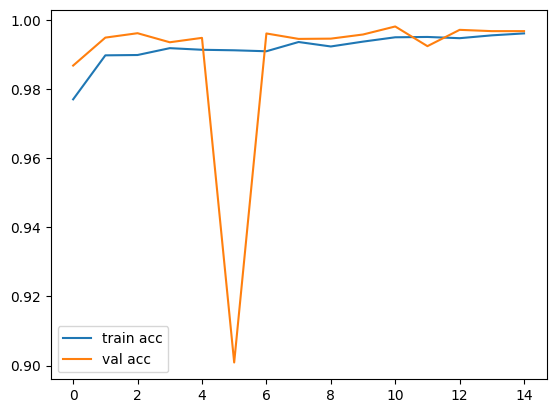

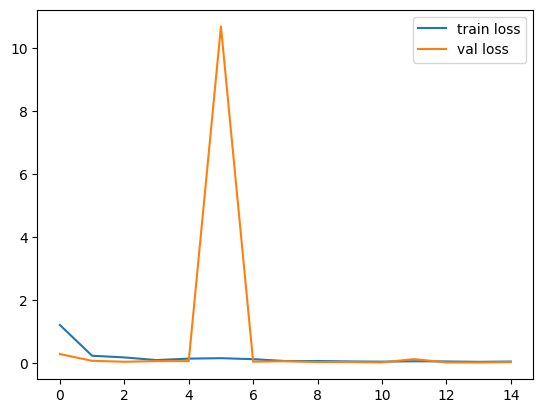

In [ ]:

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [ ]:

model.save('main.keras')
print("Model saved successfully in .keras format.")

Model saved successfully in .keras format.


In [14]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 224, 224, 1)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
from google.colab import files


class_names = ['Bone', 'Brain', 'Breast', 'Kidney']


def predict_image(img_path):
    
    try:
        img = Image.open(img_path)
        img.verify()   
    except:
        return " Corrupted image! Please upload a valid one.", None

   
    target_size = model.input_shape[1:3]  
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale') 
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)

    
    predicted_class = class_names[class_idx]
    probs = {class_names[i]: float(prediction[0][i]) for i in range(len(class_names))}

    return predicted_class, probs



uploaded = files.upload()
for fn in uploaded.keys():
    label, probs = predict_image(fn)
    print(f"\n Image: {fn}")
    print(f" Predicted Class: {label}")
    print(" Class Probabilities:", probs)